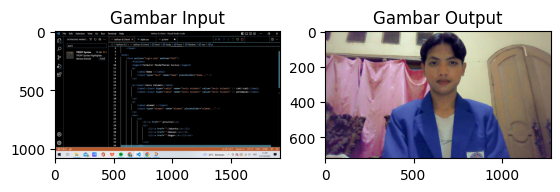

MSE: 17315.45
PSNR: 5.75


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_mse(input_data, output_data):
    mse = np.mean((input_data.astype(np.float32) - output_data.astype(np.float32))**2)
    return mse

def calculate_psnr(input_data, output_data, max_value=255):
    mse = calculate_mse(input_data, output_data)

    # Handling division by zero
    if mse == 0:
        psnr = float('inf')
    else:
        psnr = 20 * np.log10(max_value / np.sqrt(mse))

    return psnr

def resize_to_smallest_dimension(image1, image2):
    height1, width1 = image1.shape[:2]
    height2, width2 = image2.shape[:2]

    min_height = min(height1, height2)
    min_width = min(width1, width2)

    resized_image1 = cv2.resize(image1, (min_width, min_height), interpolation=cv2.INTER_AREA)
    resized_image2 = cv2.resize(image2, (min_width, min_height), interpolation=cv2.INTER_AREA)

    return resized_image1, resized_image2

# Path gambar input dan output
input_image_path = "codingan.jpg"
output_image_path = "pp almet.jpg"

# Baca gambar input dan output
input_image = cv2.imread(input_image_path)
output_image = cv2.imread(output_image_path)

# Konversi gambar BGR ke RGB (Matplotlib menggunakan format RGB)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Resize gambar agar memiliki dimensi yang sama
input_image, output_image = resize_to_smallest_dimension(input_image, output_image)

# Kalkulasi PSNR dan MSE
mse = calculate_mse(input_image, output_image)
psnr = calculate_psnr(input_image, output_image)

# Tampilkan gambar dan hasil kalkulasi
plt.subplot(1, 2, 1)
plt.imshow(input_image_rgb)
plt.title("Gambar Input")

plt.subplot(1, 2, 2)
plt.imshow(output_image_rgb)
plt.title("Gambar Output")

plt.show()

print(f"MSE: {mse:.2f}")
print(f"PSNR: {psnr:.2f}")
